<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Erick Machuca, Carlos Moreno.

**Fecha:** 15 de marzo del 2025.

**Expediente** : 742602, .
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [Repo](https://github.com/MPST-2025-I/tarea-4-ejercicio-cnn-tarea-4-1)

# Tarea X: Clase 13

## Enunciado de tarea ejercicio 1
> 1. Buscar un artículo científico donde se apliquen las CNN. Hacer una discusión y mostrar los resultados en el notebook de solución de la tarea. (Sólo se va solicitar un artículo por pareja)
2. Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset. El objetivo en este ejercicio es que usen una CNN para predecir el precio de las casas. Este dataset, ya tiene todas las características a ser usadas por el modelo, así que no tienen que realizar alguna preparación especial de los datos. Sólo buscar la mejor estructura de la CNN que les de mejores resultados.
https://www.kaggle.com/datasets/joebeachcapital/nsw-australia-electricity-demand-2018-2023/data. Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

### Ejercicio 1:
Buscar un artículo científico donde se apliquen las CNN. Hacer una discusión y mostrar los resultados en el notebook de solución de la tarea. (Sólo se va solicitar un artículo por pareja)

### Ejercicio 2:
Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

+ https://www.kaggle.com/datasets/yasserh/housing-prices-dataset. El objetivo en este ejercicio es que usen una CNN para predecir el precio de las casas. Este dataset, ya tiene todas las características a ser usadas por el modelo, así que no tienen que realizar alguna preparación especial de los datos. Sólo buscar la mejor estructura de la CNN que les de mejores resultados.
+ https://www.kaggle.com/datasets/joebeachcapital/nsw-australia-electricity-demand-2018-2023/data. Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

Código de solución estudiante Erick Machuca

#### Precio de casas

In [1]:
# Código de solución estudiante 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Input, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("data/Housing Prices Dataset.csv")

In [3]:
df.shape

(545, 13)

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
#Visualizar todo junto
def reporte(datos):
    dtyp = pd.DataFrame(datos.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(datos.isnull().sum(), columns=['Valores_Nulos'])
    unival = pd.DataFrame(datos.nunique(), columns=['Valores_Unicos'])
    maximo = pd.DataFrame(datos.max(), columns=['Max'])
    minimo = pd.DataFrame(datos.min(), columns=['Min'])
    return dtyp.join(missing).join(unival).join(maximo).join(minimo)

reporte(datos=df)

,Tipo,Valores_Nulos,Valores_Unicos,Max,Min
price,int64,0,219,13300000,1750000
area,int64,0,284,16200,1650
bedrooms,int64,0,6,6,1
bathrooms,int64,0,4,4,1
stories,int64,0,4,4,1
mainroad,object,0,2,yes,no
guestroom,object,0,2,yes,no
basement,object,0,2,yes,no
hotwaterheating,object,0,2,yes,no
airconditioning,object,0,2,yes,no


El dataset no tiene ningún dato nulo, hay 7 variables de tipo object y 6 numéricas. Las variables categóricas tienen granularidad baja, con el máximo siendo 3 valores únicos en la de ´furnishingstatus´.

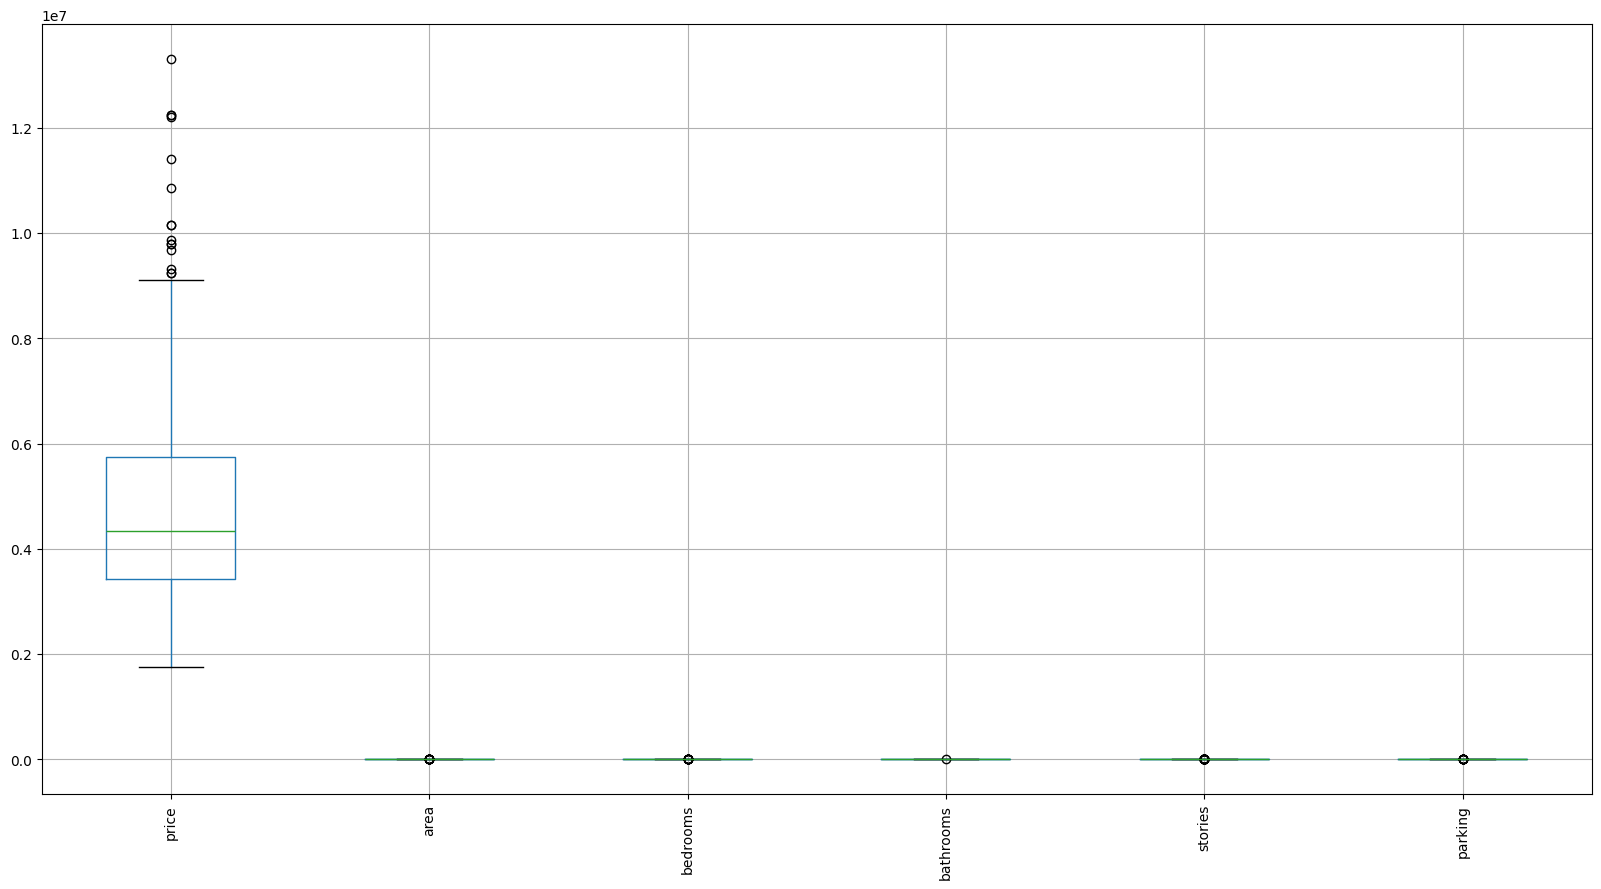

In [6]:
df.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show() # Hay datos atípicos en nuestra variable objetivo

In [7]:
def print_outliers_count(df):
    print("Valores atípicos por columna:")
    total_outliers = 0
    
    numeric_columns = df.select_dtypes(include=np.number).columns
    
    for column in numeric_columns:
        data = df[column].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        total_outliers += outliers_count
        
        print(f"  {column}: {outliers_count}")
    
    print(f"Total de valores atípicos: {total_outliers}")

print_outliers_count(df)

Valores atípicos por columna:
  price: 15
  area: 12
  bedrooms: 12
  bathrooms: 1
  stories: 41
  parking: 12
Total de valores atípicos: 93


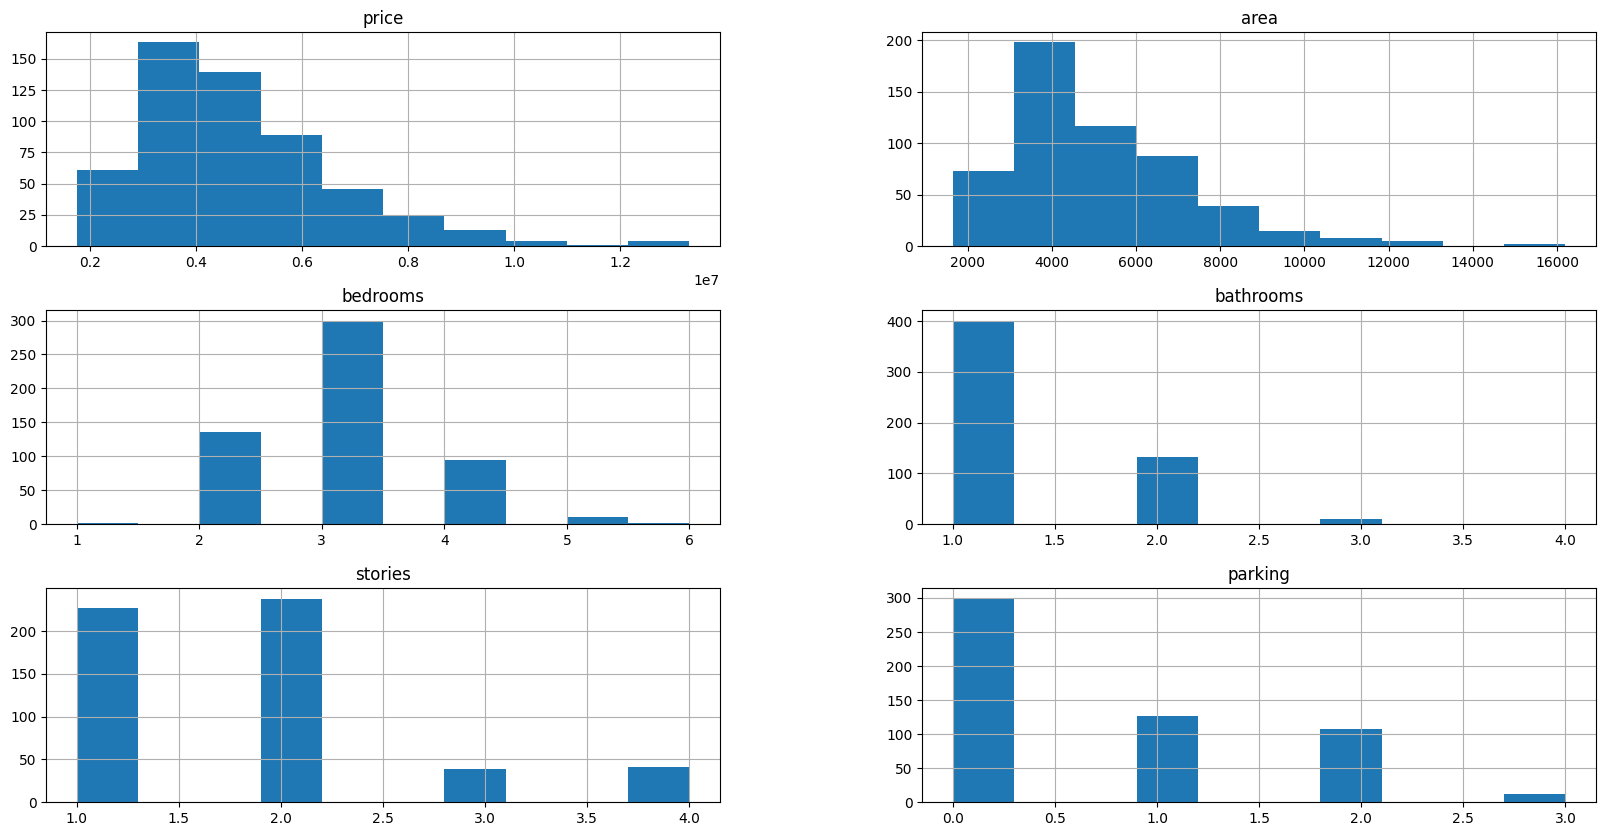

In [8]:
df.hist(figsize=(20,10))
plt.show()

In [9]:
# Calcular la asimetría (skewness) solo para columnas numéricas
numeric_columns = df.select_dtypes(include=np.number).columns
skewness = round(df[numeric_columns].skew(), 2)

# Convertir a DataFrame
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"})

# Función para clasificar la asimetría
def classify_skewness(x):
    if x['value'] < -1 or x['value'] > 1:
        return 'Muy asimétrica'
    elif -0.5 <= x['value'] <= 0.5:
        return 'Distribución simétrica'
    else:
        return 'Moderadamente asimétrica'

# Aplicar la clasificación
skewness['asimetría'] = skewness.apply(classify_skewness, axis=1)

# Mostrar resultados
skewness

,value,asimetría
price,1.21,Muy asimétrica
area,1.32,Muy asimétrica
bedrooms,0.50,Distribución simétrica
bathrooms,1.59,Muy asimétrica
stories,1.08,Muy asimétrica
parking,0.84,Moderadamente asimétrica


Se podría eliminar los datos atípicos de la variable objetivo price, no de las demás, ya que nos pueden decir información importante acerca del precio. También se podría aplicar transformaciones a la variable de area, ya que tiene asimetría.

Vamos a encodear las variables categóricas y posteriormente dividiremos en train/test y entrenar el modelo.

In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use drop='first' to avoid multicollinearity

for col in df.select_dtypes(include=['object', 'category']).columns:
    # Fit and transform the column
    encoded_data = encoder.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    
    # Drop the original column and concatenate the encoded DataFrame
    df = df.drop(col, axis=1)
    df = pd.concat([df, encoded_df], axis=1)

In [11]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [12]:
X = df.drop(columns=['price'])
y = df['price']

#Dividimos los datos en train y test para después hacer el cross validation sólo con los datos del train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [14]:
# Set seed for reproducibility
tf.random.set_seed(5465)

# Define model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=32, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Conv1D(filters=16, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

/Users/erick/Library/CloudStorage/OneDrive-ITESO/Modelos/Tarea-4/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 12, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 5, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 4, 16)          │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,449 (87.69 KB)

 Trainable params: 22,225 (86.82 KB)

 Non-trainable params: 224 (896.00 B)

In [17]:
history = model.fit(
    X_train, y_train, 
    epochs=200, 
    batch_size=32, 
    verbose=1
)


Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26623304794112.0000 - mae: 4840826.5000
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26623275433984.0000 - mae: 4840823.5000 
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26623225102336.0000 - mae: 4840818.0000 
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26623111856128.0000 - mae: 4840806.5000 
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26622847614976.0000 - mae: 4840780.0000 
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26622235246592.0000 - mae: 4840718.0000 
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26620985344000.0000 - mae: 4840595.0000 
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26618615562240.0000 - mae: 4840360.0000 
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26614794551296.0000 - mae: 4839974.5000 
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26609090297856.0000 - mae: 4839407.5000 


In [18]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2560295960576.0000 - mae: 1175931.6250 
Test MAE: 1151758.25


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


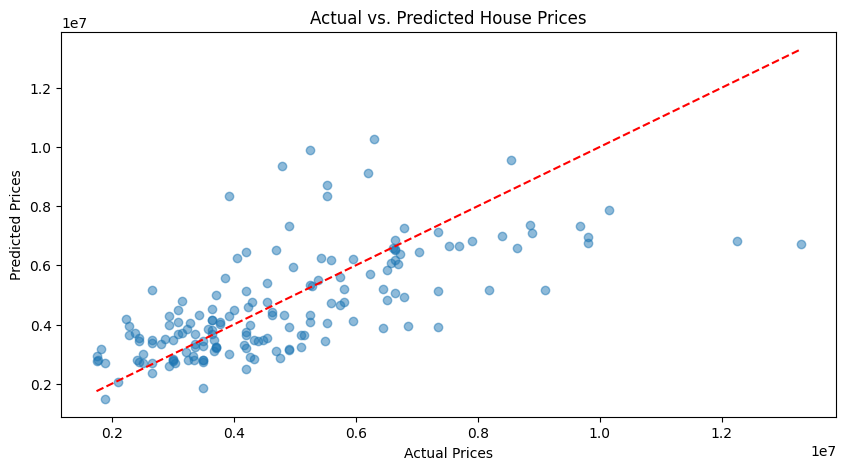

In [19]:
y_pred = model.predict(X_test)
actual_prices = y_test

plt.figure(figsize=(10, 5))
plt.scatter(actual_prices, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.plot([actual_prices.min(), actual_prices.max()], [actual_prices.min(), actual_prices.max()], 'r--')  # Ideal line
plt.show()


Podemos ver que los resultados de nuestro modelo son malos, con un MAE de 1119847.50

Considero que este modelo no es el ideal para este tipo de problema, habría que considerar otros.

#### Consumo eléctrico

In [20]:
import os
def concatenate_timeseries(directory):
    """
    Reads all CSV files in the specified directory and concatenates them into a single DataFrame.

    Parameters:
    directory (str): The path to the directory containing the CSV files.

    Returns:
    pd.DataFrame: A concatenated DataFrame containing all the time series data.
    """
    # List to hold individual DataFrames
    dfs = []

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            # Construct the full file path
            file_path = os.path.join(directory, filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Append the DataFrame to the list
            dfs.append(df)

    # Concatenate all DataFrames in the list into a single DataFrame
    concatenated_df = pd.concat(dfs, ignore_index=True)

    return concatenated_df

df1 = concatenate_timeseries("data/NSW_Electricity_Price_Demand_2018-2023")

In [21]:
df1.shape

(248592, 5)

In [22]:
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2022/07/01 00:05:00,8656.59,396.62,TRADE
1,NSW1,2022/07/01 00:10:00,8539.53,380.41,TRADE
2,NSW1,2022/07/01 00:15:00,8591.66,380.41,TRADE
3,NSW1,2022/07/01 00:20:00,8601.76,380.41,TRADE
4,NSW1,2022/07/01 00:25:00,8518.26,371.29,TRADE


In [23]:
df1.isna().sum()

REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

In [24]:
df1.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

In [25]:
# Convert 'SETTLEMENTDATE' to datetime and set it as the index
df1['SETTLEMENTDATE'] = pd.to_datetime(df1['SETTLEMENTDATE'], format='%Y/%m/%d %H:%M:%S')
df1.set_index('SETTLEMENTDATE', inplace=True)

# Rename 'TOTALDEMAND' to 'y'
df1.rename(columns={'TOTALDEMAND': 'y'}, inplace=True)

In [26]:
df1.drop(columns=['RRP', 'PERIODTYPE', 'REGION'], inplace=True)
df1 = df1.rename_axis('date')
df1.head()

,y
date,
2022-07-01 00:05:00,8656.59
2022-07-01 00:10:00,8539.53
2022-07-01 00:15:00,8591.66
2022-07-01 00:20:00,8601.76
2022-07-01 00:25:00,8518.26


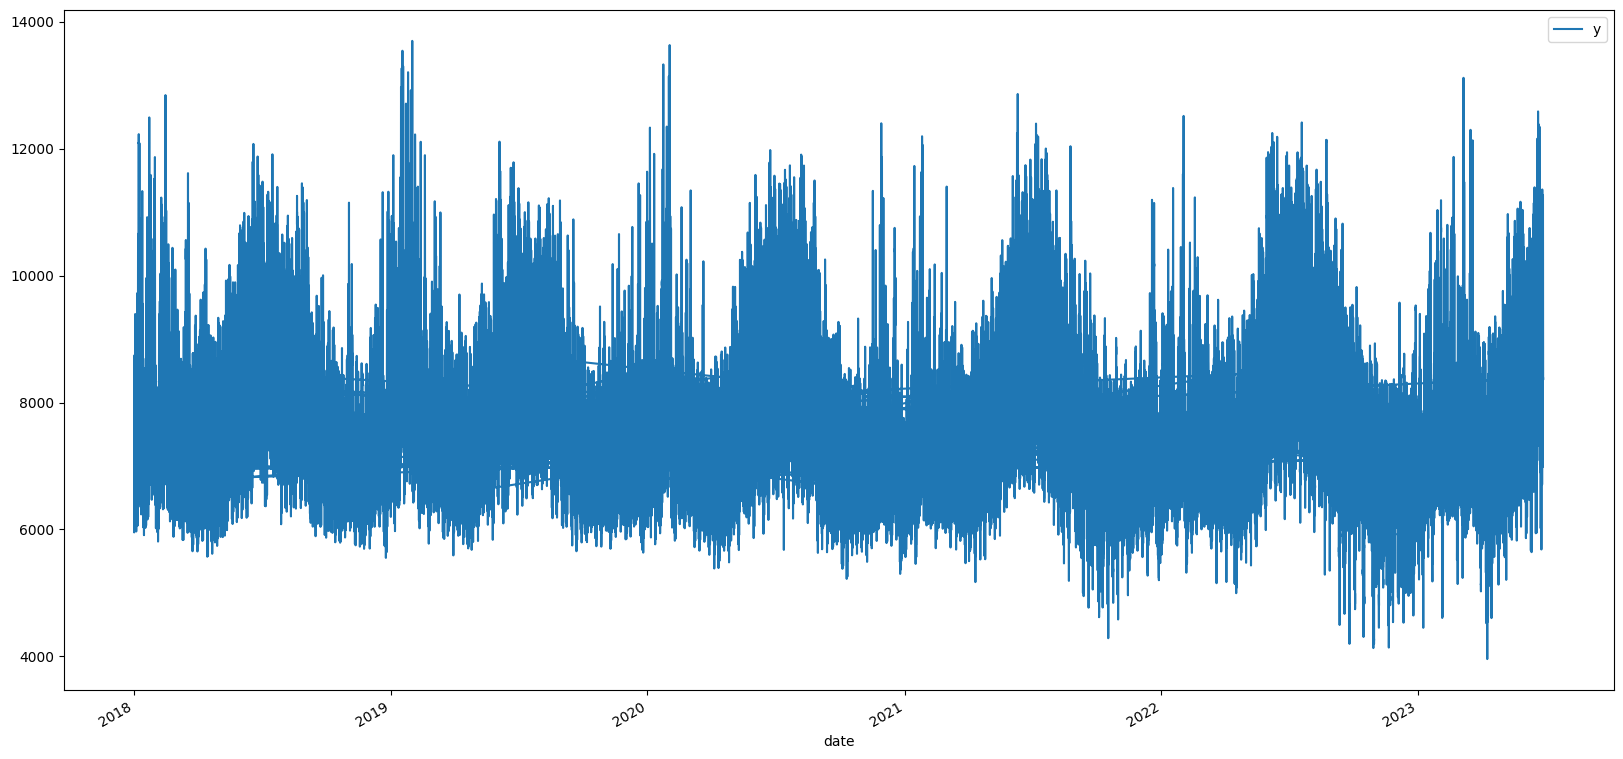

In [27]:
df1.plot(figsize=(20,10))
plt.show()

In [28]:
df1.sort_values(by='date', inplace=True)

In [29]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [30]:
# Definir parámetros
n_steps = 12
n_features = 1
X, y = split_univariate_sequence(df1['y'], n_steps)

/var/folders/_2/qz8xy45s0fv244xptjd5jqjw0000gp/T/ipykernel_34074/2044668629.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]


In [31]:
print(X.shape)
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(248580, 12)
(248580, 12, 1)


In [32]:
# Definir modelo
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(n_steps, n_features)))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

/Users/erick/Library/CloudStorage/OneDrive-ITESO/Modelos/Tarea-4/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 12, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 12, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        76,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,921 (421.57 KB)

 Trainable params: 107,537 (420.07 KB)

 Non-trainable params: 384 (1.50 KB)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [34]:
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4879163.0000 - mae: 1095.9939
Epoch 2/100
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 395108.2500 - mae: 494.9706
Epoch 3/100
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 388664.5000 - mae: 490.9145
Epoch 4/100
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 387232.5938 - mae: 490.2325
Epoch 5/100
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 385489.2188 - mae: 489.4898
Epoch 6/100
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 374824.1875 - mae: 481.2905
Epoch 7/100
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 363404.4375 - mae: 474.6080
Epoch 8/100
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 351899.5938 - mae: 467.3779
Epoch 9/100
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 292839.6250 - mae: 420.4761
Epoch 10/100
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 163995.1250 - mae: 297.3954
Epoch 11/100
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 145689.9688 

In [35]:
x_input = np.array(df1[-n_steps:]).reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat

array([[6797.7256]], dtype=float32)

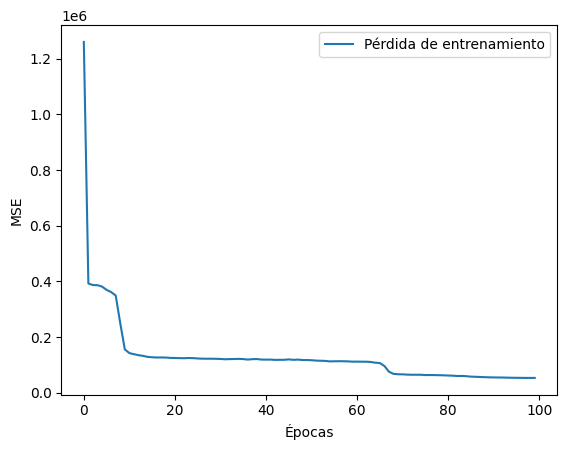

In [40]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.4f}")

2331/2331 ━━━━━━━━━━━━━━━━━━━━ 2s 725us/step - loss: 1640392.2500 - mae: 1262.6785
Test MAE: 1334.3125


2331/2331 ━━━━━━━━━━━━━━━━━━━━ 2s 663us/step


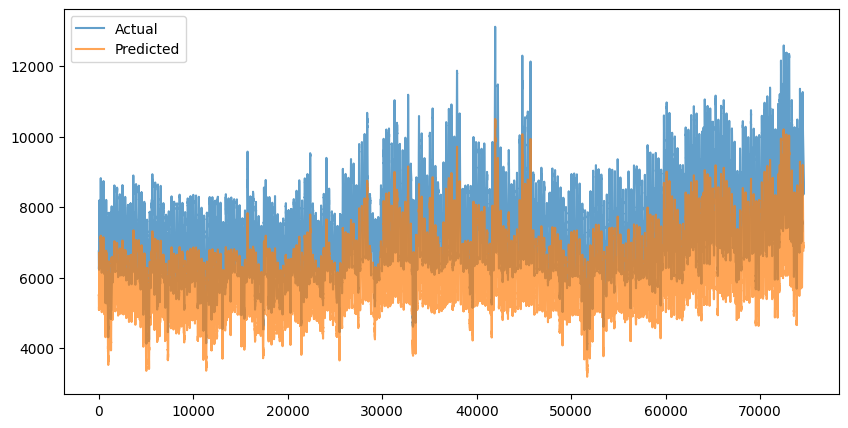

In [ ]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.show()

Código de solución estudiante 2

### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........